# **EXPLORATORY DATA ANALYSIS**
This notebook performs an in-depth exploratory data analysis of the UPSTOtrain dataset. The goal is to gain insights into the structure and content of data, identify trends or anomalies, and prepare the dataset for downstream applications.
We primarily work with SMILES strings representing chemical structures of reactants and products. RDKit is used for cheminformatics operations.

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# **Importing and Inspecting the Data**

We begin by loading the dataset and examining its structure. This includes checking the number of entries, available columns, and the type of data in each column.

Initial checks help ensure data integrity and help identify potential issues such as missing values or unexpected formats.

In [3]:
df = pd.read_csv('UPSTOtrain.csv')
df.columns = ['Reactant', 'Product']

#Check dataset shape
print(f"Dataset shape: {df.shape} (rows, columns)")

#Preview first few rows
print("\nFirst 5 rows:")
print(df.head())

#Column names
print("\nColumn names:")
print(df.columns.tolist())

#Missing values summary
print("\nMissing values per column:")
print(df.isnull().sum())

#Data types of each column
print("\nData types:")
print(df.dtypes)

#Summary statistics for numerical columns (if any)
print("\nSummary statistics:")
print(df.describe(include='all'))

#Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

#Check for inconsistencies: whitespace, empty strings
print("\nNumber of rows with blank (empty string) entries:")
blank_counts = (df == '').sum()
print(blank_counts)


Dataset shape: (7704, 2) (rows, columns)

First 5 rows:
                                            Reactant  \
0  C O C C Br . O = c 1 c ( O ) c n ( - c 2 c c c...   
1  C 1 C O C C N 1 . C c 1 c ( N C ( = O ) C Br )...   
2  Br P ( Br ) Br . C S ( = O ) ( = O ) c 1 c c c...   
3  C c 1 s c ( N C c 2 c c c c c 2 ) c ( C # N ) ...   
4  C C ( C ) ( C ) O C ( = O ) N C C ( C ) ( C ) ...   

                                             Product  
0  C O C C O c 1 c n ( - c 2 c c c c ( C ( F ) ( ...  
1  C c 1 c ( N C ( = O ) C N 2 C C O C C 2 ) c c ...  
2     C S ( = O ) ( = O ) c 1 c c c ( C Br ) c c 1 F  
3  C c 1 s c ( N ( C c 2 c c c c c 2 ) C ( = S ) ...  
4  C C ( C ) ( C N ) c 1 c c 2 c c ( N C ( = O ) ...  

Column names:
['Reactant', 'Product']

Missing values per column:
Reactant    0
Product     0
dtype: int64

Data types:
Reactant    object
Product     object
dtype: object

Summary statistics:
                                         Reactant  \
count                         

In [4]:
df

,Reactant,Product
0,C O C C Br . O = c 1 c ( O ) c n ( - c 2 c c c...,C O C C O c 1 c n ( - c 2 c c c c ( C ( F ) ( ...
1,C 1 C O C C N 1 . C c 1 c ( N C ( = O ) C Br )...,C c 1 c ( N C ( = O ) C N 2 C C O C C 2 ) c c ...
2,Br P ( Br ) Br . C S ( = O ) ( = O ) c 1 c c c...,C S ( = O ) ( = O ) c 1 c c c ( C Br ) c c 1 F
3,C c 1 s c ( N C c 2 c c c c c 2 ) c ( C # N ) ...,C c 1 s c ( N ( C c 2 c c c c c 2 ) C ( = S ) ...
4,C C ( C ) ( C ) O C ( = O ) N C C ( C ) ( C ) ...,C C ( C ) ( C N ) c 1 c c 2 c c ( N C ( = O ) ...
...,...,...
7699,C C O C ( = O ) N c 1 n c 2 c c c ( C ) c c 2 ...,C O c 1 n c 2 c c ( C ) c c c 2 n c 1 N C ( = ...
7700,C C ( C ) ( C ) c 1 c c c c ( O ) c 1 . C c 1 ...,C c 1 c c ( [N+] ( = O ) [O-] ) c n c 1 O c 1 ...
7701,C O C c 1 c c c c ( C ( = O ) c 2 n n n n 2 C ...,C O C c 1 c c c c ( C ( = N O ) c 2 n n n n 2 ...
7702,C C ( C ) ( C ) O C ( = O ) N 1 C C C ( = O ) ...,C n 1 c c n c 1 C 1 ( O ) C C N ( C ( = O ) O ...


Issues:-


*  SMILES Strings Are Spaced Out
*  62 duplicate reactions



In [5]:
# Clean spaces from SMILES strings
df['Reactant'] = df['Reactant'].str.replace(' ', '', regex=False)
df['Product'] = df['Product'].str.replace(' ', '', regex=False)

# Drop duplicates
df = df.drop_duplicates()



In [6]:
df

,Reactant,Product
0,COCCBr.O=c1c(O)cn(-c2cccc(C(F)(F)F)c2)nc1-c1cc...,COCCOc1cn(-c2cccc(C(F)(F)F)c2)nc(-c2ccnn2-c2cc...
1,C1COCCN1.Cc1c(NC(=O)CBr)cccc1[N+](=O)[O-],Cc1c(NC(=O)CN2CCOCC2)cccc1[N+](=O)[O-]
2,BrP(Br)Br.CS(=O)(=O)c1ccc(CO)cc1F,CS(=O)(=O)c1ccc(CBr)cc1F
3,Cc1sc(NCc2ccccc2)c(C#N)c1C.O=C(N=C=S)c1ccccc1,Cc1sc(N(Cc2ccccc2)C(=S)NC(=O)c2ccccc2)c(C#N)c1C
4,CC(C)(C)OC(=O)NCC(C)(C)c1cc2cc(NC(=O)C3(c4ccc5...,CC(C)(CN)c1cc2cc(NC(=O)C3(c4ccc5c(c4)OCO5)CC3)...
...,...,...
7699,CCOC(=O)Nc1nc2ccc(C)cc2nc1OC.Clc1ccccc1N1CCNCC1,COc1nc2cc(C)ccc2nc1NC(=O)N1CCN(c2ccccc2Cl)CC1
7700,CC(C)(C)c1cccc(O)c1.Cc1cc([N+](=O)[O-])cnc1Cl,Cc1cc([N+](=O)[O-])cnc1Oc1cccc(C(C)(C)C)c1
7701,COCc1cccc(C(=O)c2nnnn2C)c1.NO,COCc1cccc(C(=NO)c2nnnn2C)c1
7702,CC(C)(C)OC(=O)N1CCC(=O)CC1.Cn1ccnc1,Cn1ccnc1C1(O)CCN(C(=O)OC(C)(C)C)CC1


# **EDA Tasks for Reaction Prediction Model**
# 1.Number of molecules per reactant - to see if most reactions are single- or multi-molecule.



In [7]:
df['Reactant_num'] = df['Reactant'].apply(lambda x: len(x.split('.')))
df


/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/1982629996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reactant_num'] = df['Reactant'].apply(lambda x: len(x.split('.')))


,Reactant,Product,Reactant_num
0,COCCBr.O=c1c(O)cn(-c2cccc(C(F)(F)F)c2)nc1-c1cc...,COCCOc1cn(-c2cccc(C(F)(F)F)c2)nc(-c2ccnn2-c2cc...,2
1,C1COCCN1.Cc1c(NC(=O)CBr)cccc1[N+](=O)[O-],Cc1c(NC(=O)CN2CCOCC2)cccc1[N+](=O)[O-],2
2,BrP(Br)Br.CS(=O)(=O)c1ccc(CO)cc1F,CS(=O)(=O)c1ccc(CBr)cc1F,2
3,Cc1sc(NCc2ccccc2)c(C#N)c1C.O=C(N=C=S)c1ccccc1,Cc1sc(N(Cc2ccccc2)C(=S)NC(=O)c2ccccc2)c(C#N)c1C,2
4,CC(C)(C)OC(=O)NCC(C)(C)c1cc2cc(NC(=O)C3(c4ccc5...,CC(C)(CN)c1cc2cc(NC(=O)C3(c4ccc5c(c4)OCO5)CC3)...,1
...,...,...,...
7699,CCOC(=O)Nc1nc2ccc(C)cc2nc1OC.Clc1ccccc1N1CCNCC1,COc1nc2cc(C)ccc2nc1NC(=O)N1CCN(c2ccccc2Cl)CC1,2
7700,CC(C)(C)c1cccc(O)c1.Cc1cc([N+](=O)[O-])cnc1Cl,Cc1cc([N+](=O)[O-])cnc1Oc1cccc(C(C)(C)C)c1,2
7701,COCc1cccc(C(=O)c2nnnn2C)c1.NO,COCc1cccc(C(=NO)c2nnnn2C)c1,2
7702,CC(C)(C)OC(=O)N1CCC(=O)CC1.Cn1ccnc1,Cn1ccnc1C1(O)CCN(C(=O)OC(C)(C)C)CC1,2


In [8]:
df['Reactant_num'].value_counts()


Reactant_num
2    5599
1    1932
3     102
4       8
5       1
Name: count, dtype: int64

In [9]:
df[df["Reactant_num"] ==1]

,Reactant,Product,Reactant_num
4,CC(C)(C)OC(=O)NCC(C)(C)c1cc2cc(NC(=O)C3(c4ccc5...,CC(C)(CN)c1cc2cc(NC(=O)C3(c4ccc5c(c4)OCO5)CC3)...,1
6,COC(=O)c1cccc(Nc2ccc(C(C)(C)C)cc2)c1C(=O)OC,CC(C)(C)c1ccc(Nc2cccc(C(=O)O)c2C(=O)O)cc1,1
9,CCOC(=O)c1ccc(-n2ccc3ccc(C=O)cc32)cc1,CCOC(=O)c1ccc(-n2ccc3ccc(CO)cc32)cc1,1
12,C=CC1(C(O[SiH2]C(C)(C)C)(c2ccccc2)c2ccccc2)OC(...,C=CC1(C(O[SiH2]C(C)(C)C)(c2ccccc2)c2ccccc2)OC(...,1
15,CC(C)(C)OC(=O)N1CC(F)(c2ccc(C3=NOC(c4cc(Cl)c(C...,FC1(c2ccc(C3=NOC(c4cc(Cl)c(Cl)c(Cl)c4)(C(F)(F)...,1
...,...,...,...
7673,N#Cc1cccc2occc12,NCc1cccc2occc12,1
7674,CCOC(=O)c1c(C)ccnc1C,Cc1ccnc(C)c1CO,1
7675,CCOC(=O)c1cn2c(C(=O)NCC34CC5CC(CC(C5)C3)C4)ccc...,O=C(O)c1cn2c(C(=O)NCC34CC5CC(CC(C5)C3)C4)cccc2n1,1
7678,COc1cnc2c(c1)c(C(=O)N1CCN(C(=O)OC(C)(C)C)CC1)c...,COc1cnc2c(c1)c(C(=O)N1CCNCC1)c(Oc1cc(F)ccc1C)n...,1


# 2. Length of reactant and product SMILES - to check text complexity of input vs output.

In [10]:
df['Reactant_len'] = df['Reactant'].apply(len)
df['Product_len'] = df['Product'].apply(len)
avg_reactant = df['Reactant_len'].mean()
avg_product = df['Product_len'].mean()
print(f'Average reactant length: {avg_reactant}')
print(f'Average product length: {avg_product}')

Average reactant length: 47.517534676786184
Average product length: 41.20073279246271


/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/899905577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reactant_len'] = df['Reactant'].apply(len)
/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/899905577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_len'] = df['Product'].apply(len)


# 3.Distribution of Molecular Properties

In [11]:
def get_mols(smiles):
    return [Chem.MolFromSmiles(s) for s in smiles.split('.') if Chem.MolFromSmiles(s)]
df['reactant_mols'] = df['Reactant'].apply(get_mols)
df['product_mol'] = df['Product'].apply(lambda x: Chem.MolFromSmiles(x))

#Takes a SMILES string that might represent multiple molecules separated by "."
#Splits the string into individual molecule SMILES (e.g., "CCO.O=C=O" → "CCO", "O=C=O")
#Applies Chem.MolFromSmiles(s) from RDKit to convert each into a Mol object
#Filters out invalid SMILES (i.e., if MolFromSmiles returns None)

/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/349150562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reactant_mols'] = df['Reactant'].apply(get_mols)
/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/349150562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_mol'] = df['Product'].apply(lambda x: Chem.MolFromSmiles(x))


In [12]:
def total_mol_property(mols, prop_fn):
    return sum(prop_fn(m) for m in mols if m)
#if a reactant has 2 molecules, their property values are added together

df['reactant_MW'] = df['reactant_mols'].apply(lambda mols: total_mol_property(mols, Descriptors.MolWt))
#Total molecular weight of all reactants in a reaction

df['product_MW'] = df['product_mol'].apply(Descriptors.MolWt)
#Molecular weight of the single product molecule

df['reactant_LogP'] = df['reactant_mols'].apply(lambda mols: total_mol_property(mols, Descriptors.MolLogP))
#Total LogP (lipophilicity) of all reactants

df['product_LogP'] = df['product_mol'].apply(Descriptors.MolLogP)
# LogP of the product

/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/2548516754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reactant_MW'] = df['reactant_mols'].apply(lambda mols: total_mol_property(mols, Descriptors.MolWt))
/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/2548516754.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_MW'] = df['product_mol'].apply(Descriptors.MolWt)
/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/2548516754.py:11: Setting

In [13]:
df.tail()

,Reactant,Product,Reactant_num,Reactant_len,Product_len,reactant_mols,product_mol,reactant_MW,product_MW,reactant_LogP,product_LogP
7699,CCOC(=O)Nc1nc2ccc(C)cc2nc1OC.Clc1ccccc1N1CCNCC1,COc1nc2cc(C)ccc2nc1NC(=O)N1CCN(c2ccccc2Cl)CC1,2,47,45,[<rdkit.Chem.rdchem.Mol object at 0x165026260>...,<rdkit.Chem.rdchem.Mol object at 0x16deacc80>,457.962,411.893,4.26482,3.95432
7700,CC(C)(C)c1cccc(O)c1.Cc1cc([N+](=O)[O-])cnc1Cl,Cc1cc([N+](=O)[O-])cnc1Oc1cccc(C(C)(C)C)c1,2,45,42,[<rdkit.Chem.rdchem.Mol object at 0x165026180>...,<rdkit.Chem.rdchem.Mol object at 0x16deaccf0>,322.792,286.331,4.64132,4.38802
7701,COCc1cccc(C(=O)c2nnnn2C)c1.NO,COCc1cccc(C(=NO)c2nnnn2C)c1,2,29,27,[<rdkit.Chem.rdchem.Mol object at 0x1650260a0>...,<rdkit.Chem.rdchem.Mol object at 0x16deacd60>,265.273,247.258,-0.07820,0.58310
7702,CC(C)(C)OC(=O)N1CCC(=O)CC1.Cn1ccnc1,Cn1ccnc1C1(O)CCN(C(=O)OC(C)(C)C)CC1,2,35,35,[<rdkit.Chem.rdchem.Mol object at 0x165025fc0>...,<rdkit.Chem.rdchem.Mol object at 0x16deacdd0>,281.356,281.356,2.00650,1.63860
7703,Brc1cn[nH]c1.CC(C)(C)C(=O)Nc1ncccc1I,CC(C)(C)C(=O)Nc1ncccc1-n1cc(Br)cn1,2,36,34,[<rdkit.Chem.rdchem.Mol object at 0x165025ee0>...,<rdkit.Chem.rdchem.Mol object at 0x16deace40>,451.106,323.194,3.84300,3.01440


# 4.Visualization

<Axes: xlabel='reactant_MW', ylabel='Count'>

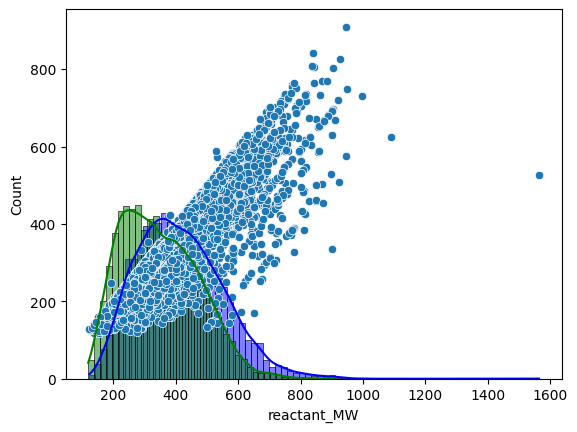

In [14]:
sns.histplot(df['reactant_MW'], kde=True, color='blue')
sns.histplot(df['product_MW'], kde=True, color='green')

sns.scatterplot(x='reactant_MW', y='product_MW', data=df)

### Distribution of Reactant Molecular Weights

This plot visualizes the distribution of molecular weights (MW) of the reactants in the dataset.

- The green histogram represents the frequency of reactants falling within specific molecular weight bins.
- The overlaid green KDE curve shows the smoothed probability density.
- The blue scatter points represent individual data entries, providing a clearer picture of data density and spread.
- The blue histogram (if applicable) might indicate a comparison group (e.g., product MWs).

**Key Observations:**
- Most reactants have molecular weights between 250 and 550 g/mol.
- The distribution is right-skewed with a few outliers reaching up to 1600 g/mol.
- These outliers may be structurally complex molecules and may require special handling or filtering during modeling.


# 5.Methods to Detect Outliers

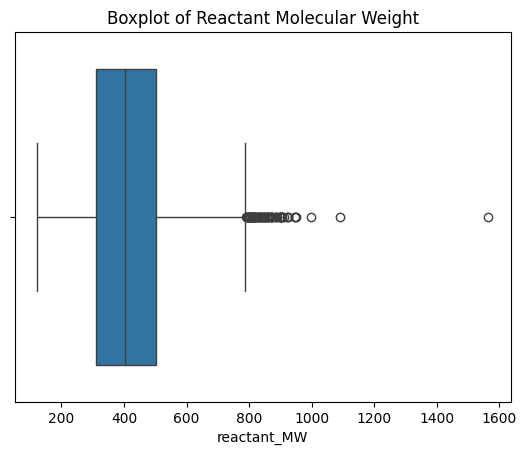

In [15]:
sns.boxplot(x=df['reactant_MW'])
plt.title('Boxplot of Reactant Molecular Weight')
plt.show()

### Boxplot of Reactant Molecular Weights

The boxplot provides a summary of the distribution of molecular weights for reactants:

- The **box** represents the interquartile range (IQR), which contains the middle 50% of values.
- The **median** (middle line) is around 400 g/mol, indicating that most molecules have moderate weights.
- **Whiskers** extend to values within 1.5 × IQR from the box edges.
- **Outliers** beyond the whiskers are clearly visible and represent molecules with unusually high molecular weights (up to 1600 g/mol).

These outliers may need special consideration during modeling, such as normalization, filtering, or log-scaling of molecular weights.


In [16]:
#1. Z-score Method: Outliers are points more than 3 standard deviations from the mean.


df['reactant_zscore'] = zscore(df['reactant_MW'])
outliers_z = df[abs(df['reactant_zscore']) > 3]

#2. IQR Method (Interquartile Range): Outliers lie below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.
Q1 = df['reactant_MW'].quantile(0.25)
Q3 = df['reactant_MW'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['reactant_MW'] < lower_bound) | (df['reactant_MW'] > upper_bound)]



/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/4025237025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reactant_zscore'] = zscore(df['reactant_MW'])


Outliers in chemical datasets (e.g., extreme molecular weights or LogP values) can significantly affect data analysis and model performance. Handling them depends on the context and purpose:


* Keep the Outliers
Retain them if they represent valid, rare chemical cases or if full data variability is needed for exploratory analysis.
* Remove the Outliers
Eliminate extreme values if they stem from data entry or parsing errors, or to improve the robustness of sensitive ML models.
* Cap or Winsorize
Replace extreme values with defined percentile-based limits to reduce their influence without removing data
*Apply Transformations
Use transformations (like log, sqrt) to reduce skewness in molecular descriptors and stabilize variance
* Use Robust Models
Algorithms like Random Forests or Gradient Boosted Trees handle outliers better without preprocessing.







# 6 .Data Quality Checks

In [17]:
df['reactant_valid'] = df['reactant_mols'].apply(lambda mols: all(m is not None for m in mols))
df['product_valid'] = df['product_mol'].apply(lambda m: m is not None)

invalid_rows = df[~df['reactant_valid'] | ~df['product_valid']]
print(f"Invalid rows: {len(invalid_rows)}")


Invalid rows: 0


/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/4150495390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reactant_valid'] = df['reactant_mols'].apply(lambda mols: all(m is not None for m in mols))
/var/folders/lw/qcd383dj3nx3f1b88pfwtgl00000gn/T/ipykernel_11798/4150495390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_valid'] = df['product_mol'].apply(lambda m: m is not None)
